<a href="https://colab.research.google.com/github/harsha5428/datascience_project/blob/main/final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab import drive
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
# Load column names from the specified text file
columns_file_path_bre = '/content/drive/MyDrive/Colab Notebooks/breast+cancer+wisconsin+diagnostic/column_name_breast.txt'
with open(columns_file_path_bre, 'r') as file:
    column_names_bre = file.read().splitlines()

# Load the main dataset
file_path = '/content/drive/MyDrive/Colab Notebooks/breast+cancer+wisconsin+diagnostic/wdbc.data'
data_bre = pd.read_csv(file_path, header=None, names=column_names_bre)

# Display the first few rows to verify
print(data_bre.head())


         ID Diagnosis  Radius Mean  Texture Mean  Perimeter Mean  Area Mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   Smoothness Mean  Compactness Mean  Concavity Mean  Concave Points Mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  Radius Worst  Texture Worst  Perimeter Worst  Area Wor

In [ ]:
data_bre.isnull().sum()

,0
ID,0
Diagnosis,0
Radius Mean,0
Texture Mean,0
Perimeter Mean,0
Area Mean,0
Smoothness Mean,0
Compactness Mean,0
Concavity Mean,0
Concave Points Mean,0


In [ ]:
data_bre.drop(["ID"], inplace=True, axis=1)
data_bre.head()

,Diagnosis,Radius Mean,Texture Mean,Perimeter Mean,Area Mean,Smoothness Mean,Compactness Mean,Concavity Mean,Concave Points Mean,Symmetry Mean,...,Radius Worst,Texture Worst,Perimeter Worst,Area Worst,Smoothness Worst,Compactness Worst,Concavity Worst,Concave Points Worst,Symmetry Worst,Fractal Dimension Worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
data_bre.shape
data_bre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Diagnosis                569 non-null    object 
 1   Radius Mean              569 non-null    float64
 2   Texture Mean             569 non-null    float64
 3   Perimeter Mean           569 non-null    float64
 4   Area Mean                569 non-null    float64
 5   Smoothness Mean          569 non-null    float64
 6   Compactness Mean         569 non-null    float64
 7   Concavity Mean           569 non-null    float64
 8   Concave Points Mean      569 non-null    float64
 9   Symmetry Mean            569 non-null    float64
 10  Fractal Dimension Mean   569 non-null    float64
 11  Radius SE                569 non-null    float64
 12  Texture SE               569 non-null    float64
 13  Perimeter SE             569 non-null    float64
 14  Area SE                  5

In [ ]:
data_bre.describe()

,Radius Mean,Texture Mean,Perimeter Mean,Area Mean,Smoothness Mean,Compactness Mean,Concavity Mean,Concave Points Mean,Symmetry Mean,Fractal Dimension Mean,...,Radius Worst,Texture Worst,Perimeter Worst,Area Worst,Smoothness Worst,Compactness Worst,Concavity Worst,Concave Points Worst,Symmetry Worst,Fractal Dimension Worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
malig_count_bre = data_bre['Diagnosis'].value_counts().get('M')
begn_count_bre = data_bre['Diagnosis'].value_counts().get('B')

print('Num of malignant cases:', malig_count_bre)
print('Num of benign cases:', begn_count_bre)

Num of malignant cases: 212
Num of benign cases: 357


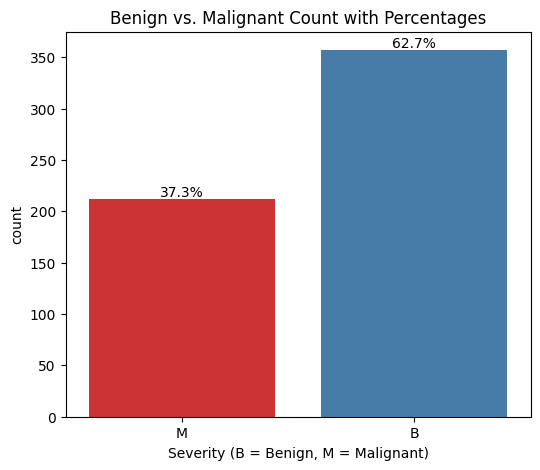

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))
ax = sns.countplot(data=data_bre, x='Diagnosis',hue='Diagnosis', palette='Set1',legend=False)
total = len(data_bre)
# Add percentage labels above each bar
for p in ax.patches:
    percentage = f"{100 * p.get_height() / total:.1f}%"
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

plt.title('Benign vs. Malignant Count with Percentages')
plt.xlabel('Severity (B = Benign, M = Malignant)')
plt.show()


In [ ]:
data_bre['Diagnosis'] = data_bre['Diagnosis'].replace({'B': 0,'M': 1})

<ipython-input-9-8f79917cba45>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_bre['Diagnosis'] = data_bre['Diagnosis'].replace({'B': 0,'M': 1})


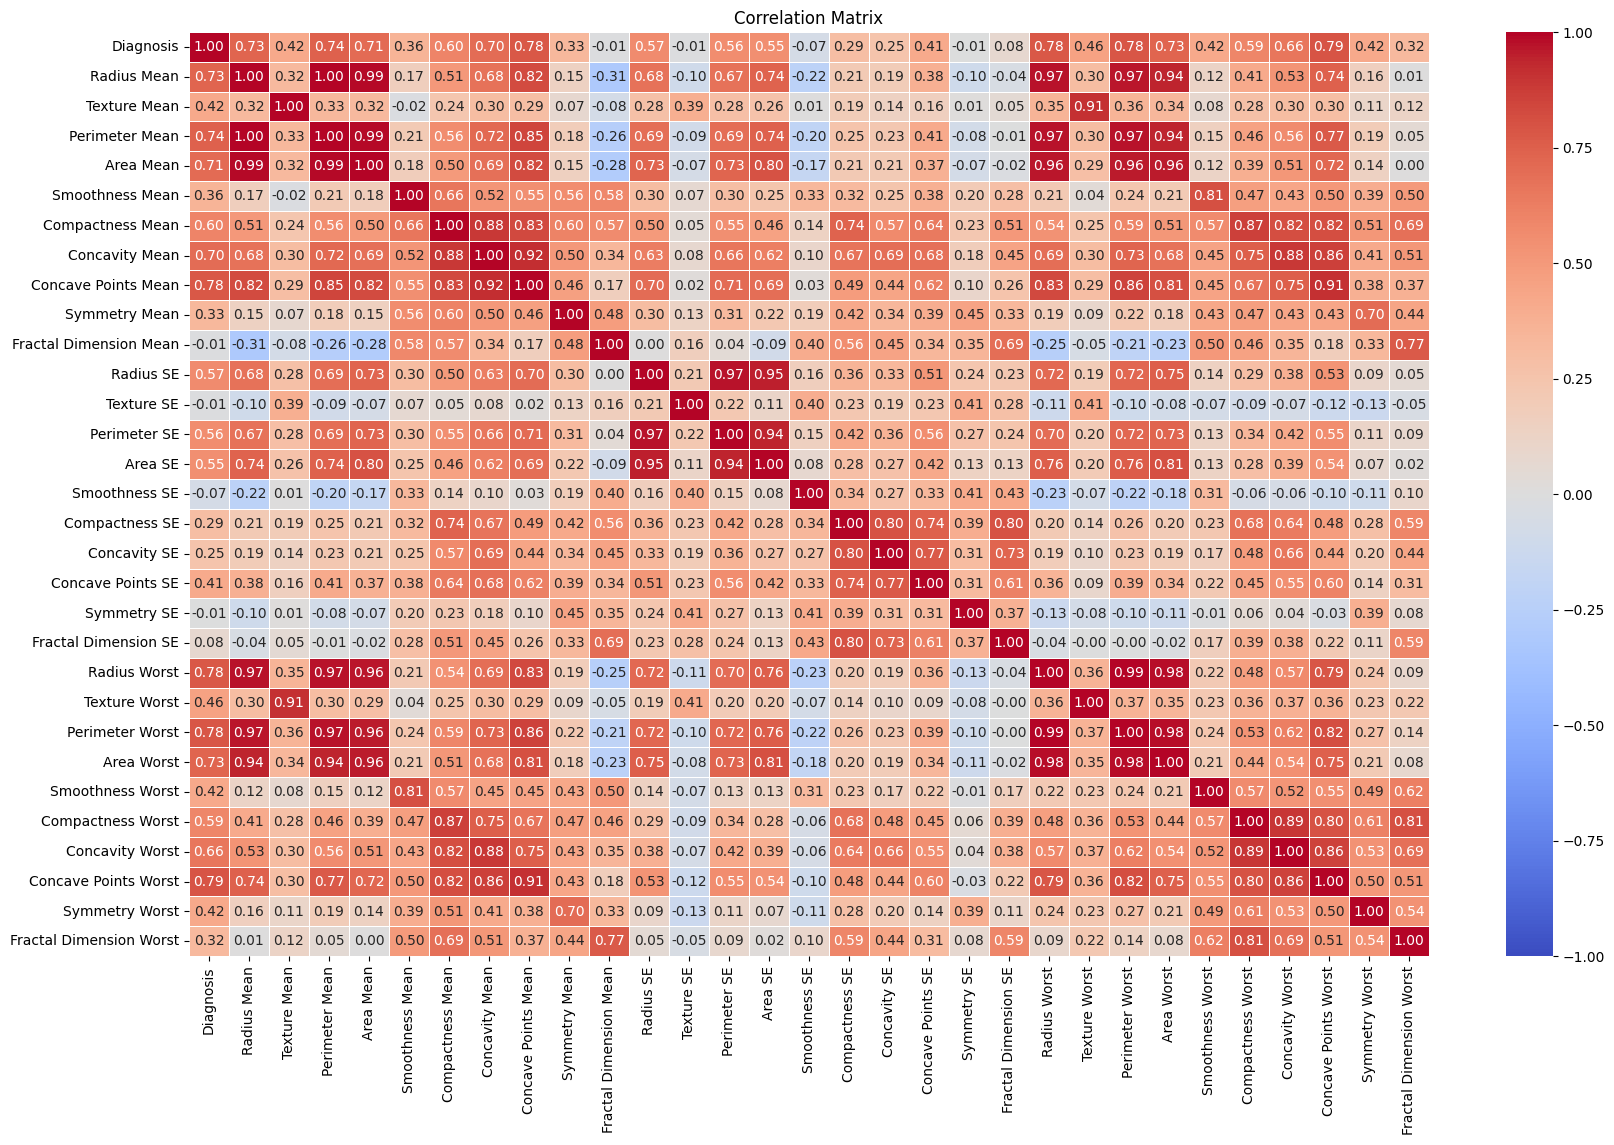

In [ ]:
# Calculate the correlation matrix
correlation_matrix = data_bre.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(20, 12))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()
